In [1]:
import pandas as pd
import seaborn as sns
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
import sklearn as sk
pd.set_option('display.max_columns', 200)  # Max columns to show
pd.set_option('display.max_rows', 40)


# data cleaning/ having fun exploring our data

In [2]:
df=pd.read_excel('BOOKS 2025-2026 (3).xlsx',sheet_name='BOOKS', header=0) #header=row it's useful if the header isnt really the first line indexed 0
df.columns

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Index([ 'Unnamed: 0',        'Item',     'BARCODE',     'MATIERE',
         'دار النشر',         'نوع', 'Description',         'EB8',
            'OUT 23',      'ACTIVE',          'IN',         'OUT',
            'STK 24',     'EST ORD',       'ORDER',          2023,
              'NOTE',    'PRICE LL',      'PRICE$',          'K-',
                'Z-',          'M-',          'F-',          'N-',
                'C-',          'Q-',          'A-'],
      dtype='object')

In [3]:
df.dtypes
df.head()

,Unnamed: 0,Item,BARCODE,MATIERE,دار النشر,نوع,Description,EB8,OUT 23,ACTIVE,IN,OUT,STK 24,EST ORD,ORDER,2023,NOTE,PRICE LL,PRICE$,K-,Z-,M-,F-,N-,C-,Q-,A-
0,2.0,مكتبة أنطوان 3,9789953262772,FRANCAIS,مكتبة انطوان,EXERCICE,Vivre le francais exercice 2 B1,EB1,-2.0,X,NaN,NaN,6.0,NaN,NaN,C-,NaN,441000.0,4.9000,NaN,NaN,NaN,NaN,NaN,C-,NaN,NaN
1,10.0,مكتبة حبيب 110,9789953522098,جغرافيا,HABIB,كتاب,1S السلسلة العلمية في الجغرافيا,1S,14.0,X,NaN,NaN,3.0,NaN,NaN,F-C-A-Q-,NaN,1800000.0,20.0000,NaN,NaN,NaN,F-,NaN,C-,Q-,A-
2,3.0,construire,7SS038,MATHS,كتب دولة مشترك,LIVRE,construire les maths 3sg t2 دولة,3SG,-1.0,X,NaN,NaN,15.0,NaN,NaN,C-,NaN,5652.0,0.0628,NaN,NaN,NaN,NaN,NaN,C-,NaN,NaN
3,12.0,دار المشرق 40,9782721493842,عربي,دار المشرق,دفتر,B9 N عقود الايام دفتر,EB9,1.0,X,NaN,NaN,3.0,NaN,NaN,F-Q-,NaN,688500.0,7.6500,NaN,NaN,NaN,F-,NaN,NaN,Q-,NaN
4,7.0,OXFORD 35,9780194399258,ENGLISH,مكتبة سمير,DIC,Oxford power dictionnary,1S,0.0,X,NaN,NaN,4.0,NaN,NaN,K-,NaN,2880000.0,32.0000,K-,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isna().sum() #do the missing values happen all at the same time ?
df['PRICE$']=df['PRICE$'].fillna(df['PRICE$'].mean())
df['PRICE LL']=df['PRICE LL'].fillna(df['PRICE LL'].mean())
df['STK 24']=df['STK 24'].fillna(0)
df.isna().sum()

Unnamed: 0      399
Item             28
BARCODE         189
MATIERE         216
دار النشر         5
نوع              69
Description       2
EB8               1
OUT 23          158
ACTIVE           52
IN             1016
OUT            1016
STK 24            0
EST ORD        1016
ORDER          1016
2023             78
NOTE            923
PRICE LL          0
PRICE$            0
K-              791
Z-              912
M-              876
F-              800
N-              812
C-              780
Q-              840
A-              784
dtype: int64

that's a lot of missing values! for the k z m f n c q a it's totally fine. however for price(i might have to drop these, it's irrational to assume the price is just the average of all prices), stock(i can work with this ig), class, item it should be fixed.
since barcode is gonna be from the source, i dont really care about it. subjects are things we can fill by checking the data but theres just too many missing values it'll take a lot of time. 

In [5]:
df.loc[df['EB8'].isna()]

,Unnamed: 0,Item,BARCODE,MATIERE,دار النشر,نوع,Description,EB8,OUT 23,ACTIVE,IN,OUT,STK 24,EST ORD,ORDER,2023,NOTE,PRICE LL,PRICE$,K-,Z-,M-,F-,N-,C-,Q-,A-
980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,982279.032934,10.93604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dropna(subset=['EB8'], inplace=True)

In [7]:
df['EB8'].isna().sum()

np.int64(0)

In [8]:
#changing name of eb8 column into grade
df=df.rename(columns={'EB8':"GRADE"})
df.columns

Index([ 'Unnamed: 0',        'Item',     'BARCODE',     'MATIERE',
         'دار النشر',         'نوع', 'Description',       'GRADE',
            'OUT 23',      'ACTIVE',          'IN',         'OUT',
            'STK 24',     'EST ORD',       'ORDER',          2023,
              'NOTE',    'PRICE LL',      'PRICE$',          'K-',
                'Z-',          'M-',          'F-',          'N-',
                'C-',          'Q-',          'A-'],
      dtype='object')

In [9]:
df.loc[df.duplicated()] #good no 2 rows are the same

,Unnamed: 0,Item,BARCODE,MATIERE,دار النشر,نوع,Description,GRADE,OUT 23,ACTIVE,IN,OUT,STK 24,EST ORD,ORDER,2023,NOTE,PRICE LL,PRICE$,K-,Z-,M-,F-,N-,C-,Q-,A-


In [10]:
df.dropna(subset=['Item','Description'], how='all', inplace=True)

In [11]:
df.isna().sum()

Unnamed: 0      397
Item             26
BARCODE         187
MATIERE         214
دار النشر         3
نوع              67
Description       0
GRADE             0
OUT 23          156
ACTIVE           50
IN             1014
OUT            1014
STK 24            0
EST ORD        1014
ORDER          1014
2023             76
NOTE            921
PRICE LL          0
PRICE$            0
K-              789
Z-              910
M-              874
F-              798
N-              810
C-              778
Q-              838
A-              782
dtype: int64

In [12]:
df.describe()

,Unnamed: 0,OUT 23,IN,OUT,STK 24,EST ORD,ORDER,PRICE LL,PRICE$
count,617.000000,858.000000,0.0,0.0,1014.000000,0.0,0.0,1.014000e+03,1014.000000
mean,7.953809,7.575758,NaN,NaN,2.268245,NaN,NaN,9.832477e+05,10.936040
std,5.211272,9.786136,NaN,NaN,8.177995,NaN,NaN,8.210458e+05,9.116264
min,1.000000,-2.000000,NaN,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000
25%,3.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,4.500000e+05,5.000000
50%,7.000000,4.000000,NaN,NaN,0.000000,NaN,NaN,8.199000e+05,9.110000
75%,12.000000,10.000000,NaN,NaN,2.000000,NaN,NaN,1.350000e+06,15.000000
max,24.000000,53.000000,NaN,NaN,142.000000,NaN,NaN,5.130000e+06,57.000000


lots of empty columns, might as well not carry them 
ok we see average size of a book is 10$ thats not bad. with a max of 57 and min of 0 ofc these are the NA (we'll show a box plot later to further understand this in fact we got a lot of plotting to do in EDA)
i might be able to get the order property tho itll do me good with some insights maybe predict how much to order based on something? (thats really advanced cause schools change books, if it wasnt the case simply checking the previous class+ OUT23 and we wouldve gotten a very sweet prediction for ordering)


In [13]:
dfnew=df[['Unnamed: 0',        'Item',     'BARCODE',     'MATIERE',
         'دار النشر',         'نوع', 'Description',         'GRADE',
            'OUT 23',      'ACTIVE',     
            'STK 24',        
              'NOTE',    'PRICE LL',      'PRICE$',          'K-',
                'Z-',          'M-',          'F-',          'N-',
                'C-',          'Q-',          'A-']].copy()

In [14]:
dfnew.columns

Index(['Unnamed: 0', 'Item', 'BARCODE', 'MATIERE', 'دار النشر', 'نوع',
       'Description', 'GRADE', 'OUT 23', 'ACTIVE', 'STK 24', 'NOTE',
       'PRICE LL', 'PRICE$', 'K-', 'Z-', 'M-', 'F-', 'N-', 'C-', 'Q-', 'A-'],
      dtype='object')

<Axes: ylabel='PRICE$'>

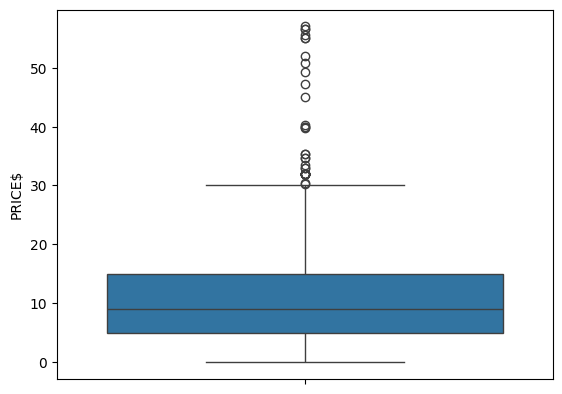

In [15]:
sns.boxplot(df['PRICE$'])

ok we see the range is 30, (most prices are between these 2 values) we have outliers tho, many of them. but for me i dont they are that much of outliers. we can see the median being less than 10 which is great, more than half of the books' prices arent above the 10$.


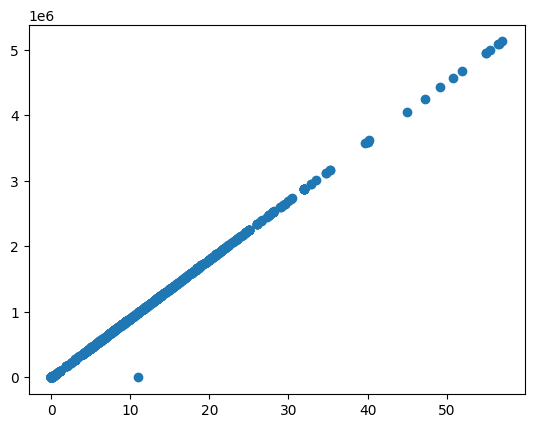

In [16]:
plt.scatter(df['PRICE$'], df['PRICE LL'])
plt.show() 
#showing that conversion rate was the same for all

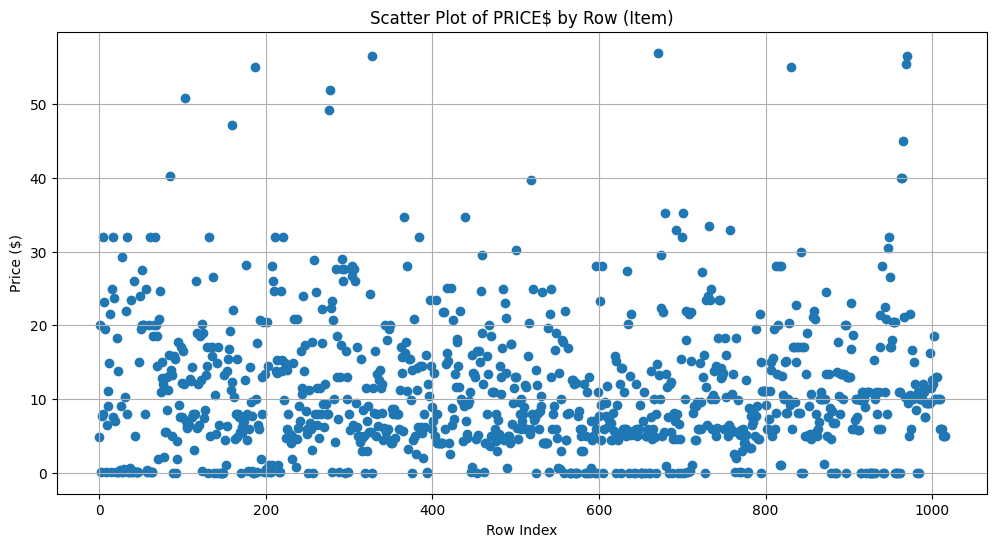

In [17]:
plt.figure(figsize=(12,6))
plt.scatter(df.index, df['PRICE$'])
plt.title('Scatter Plot of PRICE$ by Row (Item)')
plt.xlabel('Row Index')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

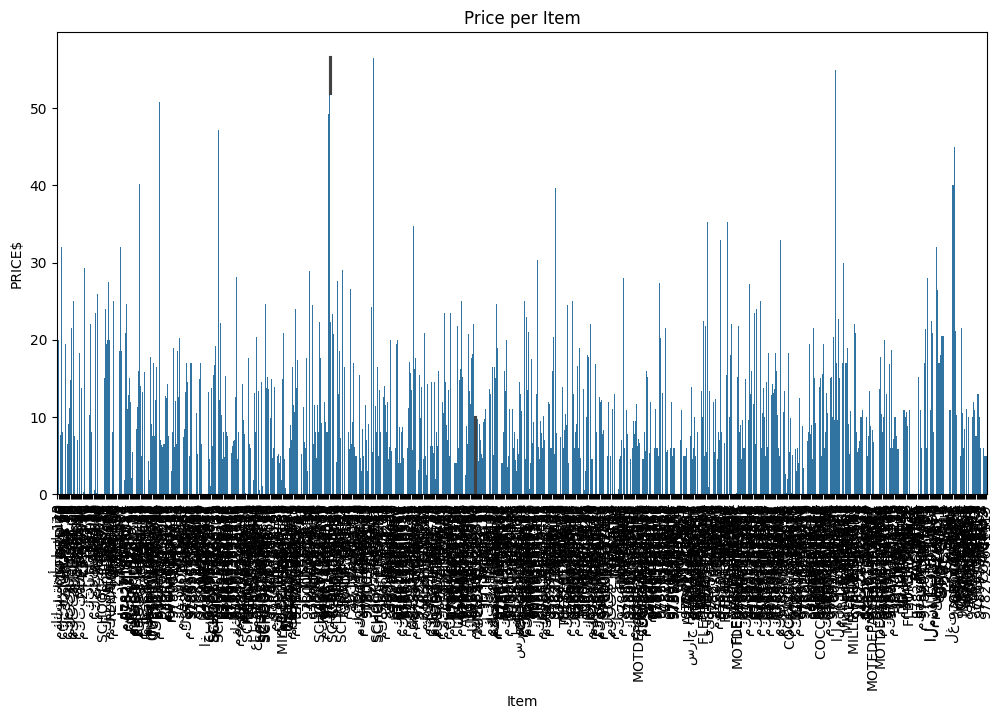

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Item', y='PRICE$')
plt.xticks(rotation=90)
plt.title('Price per Item')
plt.show()

woah ok scatter worked so much better lol. bar plots wouldve been cool if we didnt have that many rows!

In [19]:
df.loc[df["PRICE$"].idxmax()]

Unnamed: 0                                    8.0
Item                                لغتي 5 مجموعة
BARCODE                             9786144007976
MATIERE                                      عربي
دار النشر                               دار الفكر
نوع                                          كتاب
Description    EB5 لغتي فرحي 6 كتيبات مجموعة 2023
GRADE                                         EB5
OUT 23                                        7.0
ACTIVE                                          X
IN                                            NaN
OUT                                           NaN
STK 24                                        1.0
EST ORD                                       NaN
ORDER                                         NaN
2023                                       K-Z-N-
NOTE                                     NEW 2017
PRICE LL                                5130000.0
PRICE$                                       57.0
K-                                             K-


In [20]:
df['MATIERE'].value_counts()

MATIERE
عربي            158
FRANCAIS        147
anglais          74
MATHS            46
تاريخ            31
               ... 
INFORMATIQUE      1
FRANCAIS          1
pHYSIQUE          1
geo               1
CAHIER            1
Name: count, Length: 48, dtype: int64

ok we have a tiny problem, some subjects were written differently although theyre the same, we cant allow this. itll affect our analysis
din=دين=CATECHESE
SCIENCES=science=SCIENCE
INFO=INFORM=INFORMATIQUE 
ARABE=عربي
FRANCAIS=frANCAIS=francais
PHYSIQUE=pHYSIQUE
ENGLISH=ANGLAIS
THE CAHIER is suspiscious. this is not type. this is subject. so find its row and fix it according to its name

if geo isnt some french georgraphy book u have to put it as جغرافيا
why is تربية 


In [21]:
df.loc[df['MATIERE']=='CAHIER']

,Unnamed: 0,Item,BARCODE,MATIERE,دار النشر,نوع,Description,GRADE,OUT 23,ACTIVE,IN,OUT,STK 24,EST ORD,ORDER,2023,NOTE,PRICE LL,PRICE$,K-,Z-,M-,F-,N-,C-,Q-,A-
1015,NaN,9782725641119,9782725641119,CAHIER,RETZ,CAHIER,plume d ecole gs cahier francais,GS,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,450000.0,5.0,K-,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ok change cahier to FRANCAIS

In [22]:
subject_map={'francais ':'FRANCAIS', 'frANCAIS': 'FRANCAIS','BIOLOGIE ':'BIOLOGIE','pHYSIQUE':'PHYSIQUE','ANGLAIS':'ENGLISH', 'anglais':'ENGLISH', 'maths':'MATHS','ARABE':'عربي','arabe':'عربي', 'INFORM':'INFO', 'INFORMATIQUE':'INFO','CAHIER':'FRANCAIS','DIN':'دين','CATECHESE':'دين', 'SCIENCE':'SCIENCES','science':'SCIENCES'}
df['MATIERE']=df['MATIERE'].map(subject_map).fillna(df['MATIERE'])
# Strip whitespace
df['MATIERE'] = df['MATIERE'].str.strip()
valuecountsdf=df['MATIERE'].value_counts()
print(valuecountsdf)

MATIERE
عربي           165
FRANCAIS       151
ENGLISH         94
MATHS           47
BIOLOGIE        33
تاريخ           31
جغرافيا         27
دين             27
CHIMIE          26
PHYSIQUE        26
تربية           24
arabe           24
SCIENCES        14
CONTES          14
قصص             13
INFO            11
حنطة            10
ECONOMIE         8
PHILOSOPHIE      7
اجتماع           7
SOCIOLOGIE       7
CONTE            6
فلسفة            5
HIST/GEO         5
اقتصاد           4
ANGLAIS          4
خط               3
ART              3
CULTURE          2
ترجمة            1
geo              1
Name: count, dtype: int64


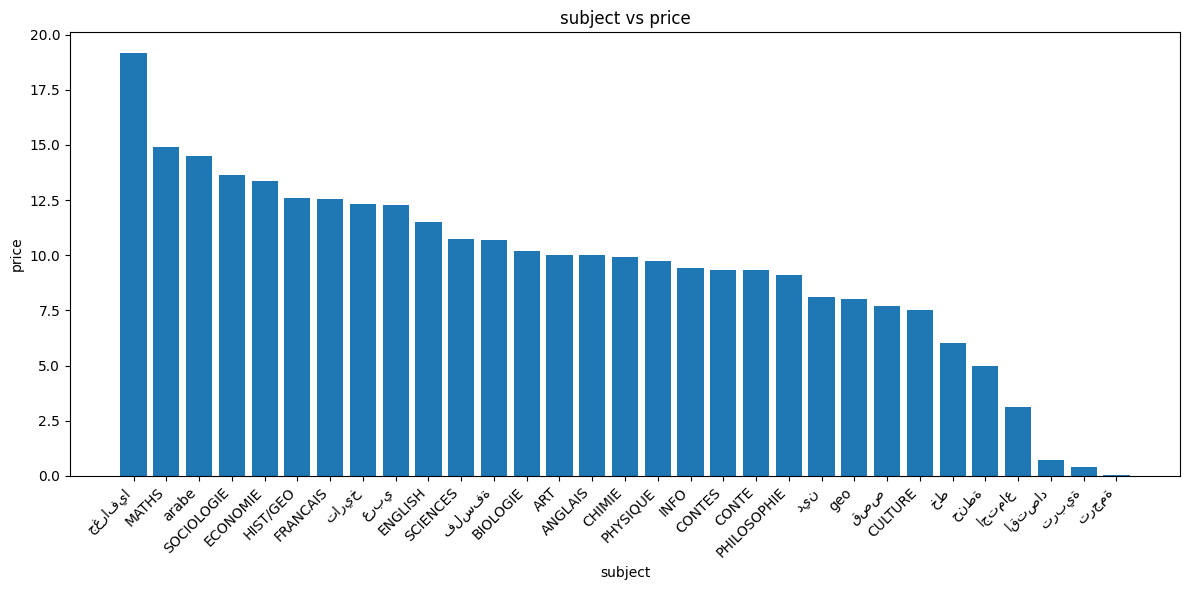

In [23]:
#woah, ok now lets bar plot, matiere vs price. to see which subjects is usually the most costly. 
plt.figure(figsize=(12,6))
avg_price = df.groupby('MATIERE')['PRICE$'].mean().sort_values(ascending=False)

plt.bar(avg_price.index, avg_price.values)
plt.title('subject vs price')
plt.xlabel("subject")
plt.ylabel("price")
plt.xticks(ticks=range(len(avg_price)), labels=avg_price.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

shows as kinda expected that geography and maths books are the most expensive. which is normally the case
also this kinda defeats the thought that "english and french books are always exported from abroad and are so expensive!" unfortunatly even locally produced geography books can get a higher price than these. (ofc shipping heavy books in the presence of good publishing houses here is not ecofriendly at all, we arent encouraging the support of foreign brands but pushing the local ones to reconsider the crazy prices.)
now to show the most expensive ones of these. (which bookstore are we getting them from? it'll be nice to know the cheaper alternatives as well to reduce total price of book lists)
why are those last few books so negligent, we gotta check cause this is not normal


we can see most of the expensive books are high school related. these are generally books that can be bought used, but people struggle to find them usually since most kids graduate and forget to sell their books.
better advertising might do the trick. 
now for geography

In [24]:
top10_geography=df[df["MATIERE"]=="جغرافيا"].sort_values(by='PRICE$', ascending=False).head(10)
print(top10_geography)

     Unnamed: 0                 Item        BARCODE  MATIERE      دار النشر  \
521        20.0         دار  الفكر48  9786144007686  جغرافيا      دار الفكر   
260        18.0         دار  الفكر50  9786144006498  جغرافيا      دار الفكر   
397        15.0         دار  الفكر49  9786144007266  جغرافيا      دار الفكر   
6          12.0             أهلية 68       50005399  جغرافيا  مكتبة الاهلية   
267        17.0             أهلية 66  9789953971315  جغرافيا  مكتبة الاهلية   
13         10.0         دار  الفكر56  9786144006511  جغرافيا      دار الفكر   
541        11.0         دار  الفكر56  9786144006511  جغرافيا      دار الفكر   
857        22.0             أهلية 62       50005217  جغرافيا  مكتبة الاهلية   
197        14.0  عالمنا المعاصر S3SE          10037  جغرافيا  مكتبة الاهلية   
201        16.0  عالمنا المعاصر S3SE          10037  جغرافيا  مكتبة الاهلية   

      نوع                     Description GRADE  OUT 23 ACTIVE  IN  OUT  \
521  كتاب           B7 الجغرافيا المنهجية   EB7    11.0

these can also be bought used, if the students take good care of their books
but still having the majority of local books be priced more than non local ones is controversial
let's check the least expensive ones 

In [25]:
least10_geography=df[df["MATIERE"]=="جغرافيا"].sort_values(by='PRICE$', ascending=False).tail(10)
print(least10_geography)

     Unnamed: 0             Item        BARCODE  MATIERE      دار النشر   نوع  \
7          11.0  مكتبة  حبيب  17  9789953522111  جغرافيا          HABIB  كتاب   
125        18.0         أهلية 64       50005346  جغرافيا  مكتبة الاهلية  كتاب   
549        17.0    9789953522074  9789953522074  جغرافيا          HABIB  كتاب   
345        12.0    9789953522067  9789953522067  جغرافيا          HABIB  كتاب   
833        12.0         EXTERN 4            NaN  جغرافيا          HABIB  كتاب   
86         13.5  مكتبة  حبيب  12  9789953522029  جغرافيا          HABIB  كتاب   
573        15.0  مكتبة  حبيب  11  9789953522012  جغرافيا          HABIB  كتاب   
102        13.0  مكتبة  حبيب  15  9789953522050  جغرافيا          HABIB  كتاب   
271        16.0  مكتبة  حبيب  13  9789953522036  جغرافيا          HABIB  كتاب   
586        16.0  مكتبة  حبيب  14  9789953522043  جغرافيا          HABIB  كتاب   

                           Description GRADE  OUT 23 ACTIVE  IN  OUT  STK 24  \
7    2H   السلسلة العلمية في

woah even some of the cheapest books are almost 20!
ok now back to checking if theres more cleaning to do for the data

In [26]:
df.isna().sum()

Unnamed: 0      397
Item             26
BARCODE         187
MATIERE         214
دار النشر         3
نوع              67
Description       0
GRADE             0
OUT 23          156
ACTIVE           50
IN             1014
OUT            1014
STK 24            0
EST ORD        1014
ORDER          1014
2023             76
NOTE            921
PRICE LL          0
PRICE$            0
K-              789
Z-              910
M-              874
F-              798
N-              810
C-              778
Q-              838
A-              782
dtype: int64

ok for price i can either drop or replace with average FOR SUBJECT. 
im not interested in note section,

In [27]:
df=df[['Unnamed: 0',        'Item',     'BARCODE',     'MATIERE',
         'دار النشر',         'نوع', 'Description',       'GRADE',
            'OUT 23',      'ACTIVE',         
            'STK 24',     'EST ORD',       'ORDER',        
                 'PRICE LL',      'PRICE$',          'K-',
                'Z-',          'M-',          'F-',          'N-',
                'C-',          'Q-',          'A-']].copy()

In [28]:
df.isna().sum()

Unnamed: 0      397
Item             26
BARCODE         187
MATIERE         214
دار النشر         3
نوع              67
Description       0
GRADE             0
OUT 23          156
ACTIVE           50
STK 24            0
EST ORD        1014
ORDER          1014
PRICE LL          0
PRICE$            0
K-              789
Z-              910
M-              874
F-              798
N-              810
C-              778
Q-              838
A-              782
dtype: int64

so i still need to fix: missing prices (for the sake of practice i wont drop these, and ill instead replace by their mean depending on each suject, but i really dont think it's legal lol),  the ones with no dar nasher i will put them in an "others" category, 
if idk the stock i can either go check monday(but for 86 values it's crazy. or put them =0 ) assuming the worst case of not having anything. (in our case, we dont buy a lot of books since schools change book names all the time and publishers publish new versions every now and then, so assuming it's zero wont hurt the bank much. but assuming we have a lot will be brutal during back to school season). since these are values we might be using in predictions later on

In [29]:
for el in df['MATIERE'].unique():
    mask = (df['MATIERE'] == el)
    mean_price = df.loc[mask, 'PRICE$'].mean() #find mean only for price! if u dont include the second itll bring a series of means
    mean_pricelb= df.loc[mask, 'PRICE LL'].mean()
    df.loc[mask, 'PRICE$'] = df.loc[mask, 'PRICE$'].fillna(mean_price)
    df.loc[mask, 'PRICE LL']=df.loc[mask,'PRICE LL'].fillna(mean_pricelb)

In [30]:
df.isna().sum()

Unnamed: 0      397
Item             26
BARCODE         187
MATIERE         214
دار النشر         3
نوع              67
Description       0
GRADE             0
OUT 23          156
ACTIVE           50
STK 24            0
EST ORD        1014
ORDER          1014
PRICE LL          0
PRICE$            0
K-              789
Z-              910
M-              874
F-              798
N-              810
C-              778
Q-              838
A-              782
dtype: int64

In [31]:
df.loc[df['PRICE$'].isna()]

,Unnamed: 0,Item,BARCODE,MATIERE,دار النشر,نوع,Description,GRADE,OUT 23,ACTIVE,STK 24,EST ORD,ORDER,PRICE LL,PRICE$,K-,Z-,M-,F-,N-,C-,Q-,A-


ok i'll keep these. because most of the are new books whose price we'll know soon. 
sinon, i'll drop them later. since most them arent that essential. but i should try my best not to drop for later book list making.
since most of this info can be collected (takes time yes but easily doable) we check monday.

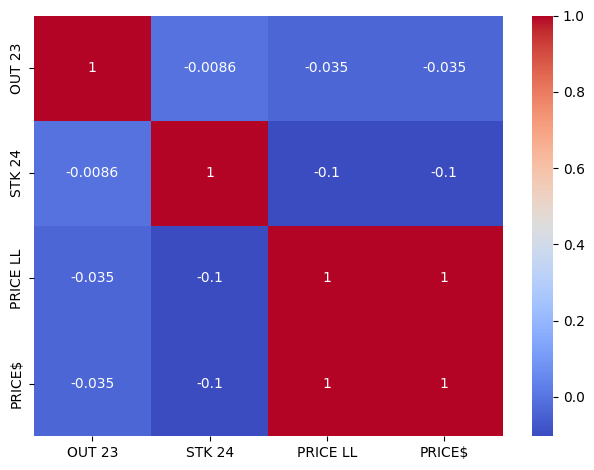

In [32]:
numericdf=df[[      
            'OUT 23',           
            'STK 24',            
                 'PRICE LL',      'PRICE$']]
corr=numericdf.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()


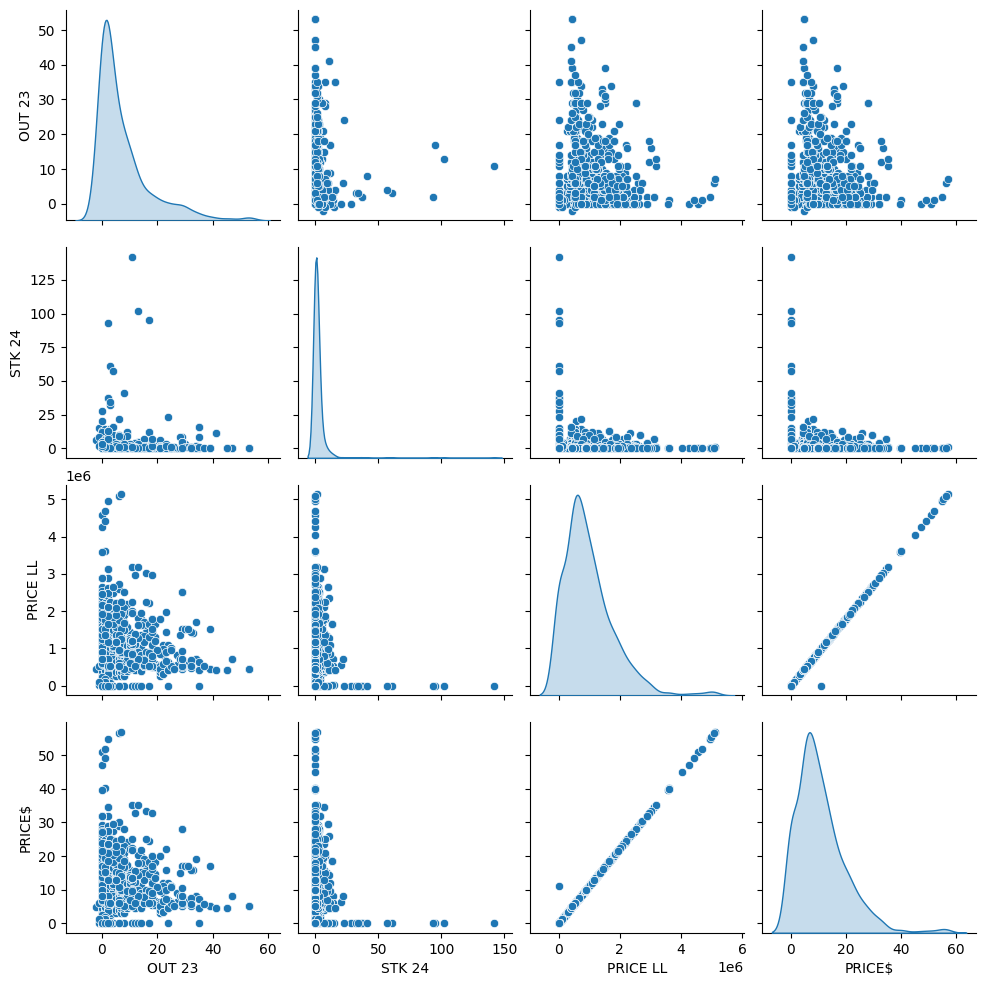

In [33]:
sns.pairplot(df[numericdf.columns], diag_kind='kde')
plt.show()

out23 vs price shows that most of the books sold last year were on the cheaper side. validates what was previously stated that 

In [34]:
df.isna().sum() 

Unnamed: 0      397
Item             26
BARCODE         187
MATIERE         214
دار النشر         3
نوع              67
Description       0
GRADE             0
OUT 23          156
ACTIVE           50
STK 24            0
EST ORD        1014
ORDER          1014
PRICE LL          0
PRICE$            0
K-              789
Z-              910
M-              874
F-              798
N-              810
C-              778
Q-              838
A-              782
dtype: int64

In [35]:
#fill not availble stocks with zero
df.fillna({"STK 24":0}, inplace=True)

In [36]:
df.isna().sum()

Unnamed: 0      397
Item             26
BARCODE         187
MATIERE         214
دار النشر         3
نوع              67
Description       0
GRADE             0
OUT 23          156
ACTIVE           50
STK 24            0
EST ORD        1014
ORDER          1014
PRICE LL          0
PRICE$            0
K-              789
Z-              910
M-              874
F-              798
N-              810
C-              778
Q-              838
A-              782
dtype: int64

In [37]:
df["GRADE"].unique()

array(['EB1', '1S', '3SG', 'EB9', '2H', 'EB8', '3SV', '2S', '3LH', '3SE',
       '3SEGVH', 'EB7', 'EB2', 'GS', 'EB6', 'EB3', 'EB4', 'EB5', 'PS2',
       'EB6 ', 'PS1', 'PS2 ', 'PS1 ', 'SV', 'EB1 ', 'EB8 ', 'SE', 'SG',
       'EB3 ', '3SEV', 'EB7 ', 'GS ', 'EB4 '], dtype=object)

In [38]:
#ugh ok map in order to remove diff 
dict={'EB1 ':'EB1', '3SG':'SG', '3SV':'SV', '3SE':'SE', '3SEV':'S3', '3LH':'LH', '3SEGVH':'S3', 'PS1 ':'PS1','PS2 ':'PS2','EB3 ':'EB3', 'EB7 ':'EB7','EB8 ':'EB8', 'GS ':'GS', 'EB6 ':'EB6', 'EB4 ':'EB4'}
df['GRADE']=df["GRADE"].map(dict).fillna(df['GRADE'])

df['GRADE'].unique()

array(['EB1', '1S', 'SG', 'EB9', '2H', 'EB8', 'SV', '2S', 'LH', 'SE',
       'S3', 'EB7', 'EB2', 'GS', 'EB6', 'EB3', 'EB4', 'EB5', 'PS2', 'PS1'],
      dtype=object)

In [39]:
df.loc[df['GRADE']=='3SEV']

,Unnamed: 0,Item,BARCODE,MATIERE,دار النشر,نوع,Description,GRADE,OUT 23,ACTIVE,STK 24,EST ORD,ORDER,PRICE LL,PRICE$,K-,Z-,M-,F-,N-,C-,Q-,A-


In [40]:
#now categorize into preschool-middleschool-highschool 
grade_to_cat={'EB1':'ELEMENTARYSCHOOL','EB2':'ELEMENTARYSCHOOL','EB3':'ELEMENTARYSCHOOL','EB4':'ELEMENTARYSCHOOL', 'EB5':'ELEMENTARYSCHOOL','EB6':'ELEMENTARYSCHOOL', 'EB7':'MIDDLESCHOOL', 'EB8':'MIDDLESCHOOL', 'EB9':'MIDDLESCHOOL', '1S':'HIGHSCHOOL', '2S':'HIGHSCHOOL','2H':'HIGHSCHOOL','SG':'HIGHSCHOOL','SV':'HIGHSCHOOL','LH':'HIGHSCHOOL','SE':'HIGHSCHOOL','S3':'HIGHSCHOOL', 'PS1':'PRESCHOOL', 'PS2':'PRESCHOOL','PS3':'PRESCHOOL'}
df['SECTION']=df["GRADE"].map(grade_to_cat)
df.head()


,Unnamed: 0,Item,BARCODE,MATIERE,دار النشر,نوع,Description,GRADE,OUT 23,ACTIVE,STK 24,EST ORD,ORDER,PRICE LL,PRICE$,K-,Z-,M-,F-,N-,C-,Q-,A-,SECTION
0,2.0,مكتبة أنطوان 3,9789953262772,FRANCAIS,مكتبة انطوان,EXERCICE,Vivre le francais exercice 2 B1,EB1,-2.0,X,6.0,NaN,NaN,441000.0,4.9000,NaN,NaN,NaN,NaN,NaN,C-,NaN,NaN,ELEMENTARYSCHOOL
1,10.0,مكتبة حبيب 110,9789953522098,جغرافيا,HABIB,كتاب,1S السلسلة العلمية في الجغرافيا,1S,14.0,X,3.0,NaN,NaN,1800000.0,20.0000,NaN,NaN,NaN,F-,NaN,C-,Q-,A-,HIGHSCHOOL
2,3.0,construire,7SS038,MATHS,كتب دولة مشترك,LIVRE,construire les maths 3sg t2 دولة,SG,-1.0,X,15.0,NaN,NaN,5652.0,0.0628,NaN,NaN,NaN,NaN,NaN,C-,NaN,NaN,HIGHSCHOOL
3,12.0,دار المشرق 40,9782721493842,عربي,دار المشرق,دفتر,B9 N عقود الايام دفتر,EB9,1.0,X,3.0,NaN,NaN,688500.0,7.6500,NaN,NaN,NaN,F-,NaN,NaN,Q-,NaN,MIDDLESCHOOL
4,7.0,OXFORD 35,9780194399258,ENGLISH,مكتبة سمير,DIC,Oxford power dictionnary,1S,0.0,X,4.0,NaN,NaN,2880000.0,32.0000,K-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIGHSCHOOL


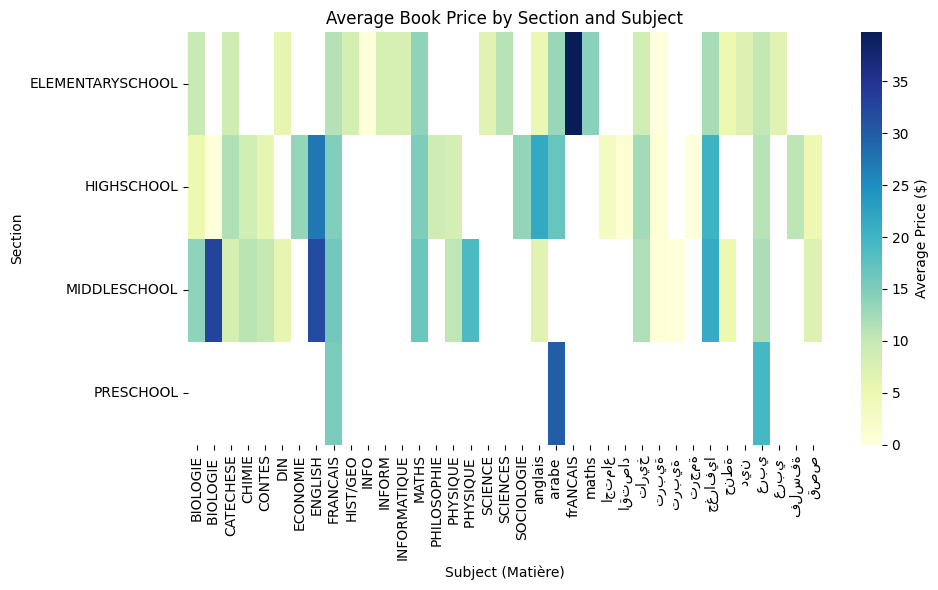

In [ ]:
pivot = df.pivot_table(index='SECTION', columns='MATIERE', values='PRICE$', aggfunc='mean')

# Then plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=False, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Average Price ($)'})
plt.title("Average Book Price by Section and Subject")
plt.ylabel("Section")
plt.xlabel("Subject (Matière)")
plt.tight_layout()
plt.show()

# Model Deployement

we'll use one-hot encoding cause we have categorical columns we need to make them numerical. 

In [ ]:
list=df['دار النشر'].unique()
print(list)
list.size

['مكتبة انطوان' 'HABIB' 'كتب دولة مشترك' 'دار المشرق' 'مكتبة سمير'
 'مكتبة الاهلية' 'HATEM' 'دار الفكر' 'دار المفيد' 'دار العلم للملاين'
 'فيروز' 'مكتبة حاتم ' 'قصص خاصة' 'دولة مشترك' 'SCHOOL PRESS'
 'RENAISSANCE' 'LONGMAN' 'SAMIR' 'دار الشمال' 'حبة الحنطة' 'CRDP'
 'مكتبة خوري' 'habib' 'ابداع' 'محبة' 'تربية مدنية' 'KEDEMOS' 'AHLIA'
 'YORK' 'BORDAS' 'CONTES' 'دار التجدد' 'دار الفكر ' 'BRITISH '
 'مكتبة نوفل' 'دولة ' 'براني' nan 'KHOURY ' 'AOUN' 'BELIN' 'NATHAN'
 'كتب براني ' 'ROUPHAEL' 'مكتبة حاتم' 'بركات' 'ANNALE' 'كتب براني'
 'دار الشمال ' 'مكتبةة حاتم' 'جبران' 'ANTOINE ' 'BARAKAT' 'قصص' 'hatem'
 'CONTE ' 'HATIER' 'مكتبة  انطوان ' 'FEKER ' 'دار ميترا' 'HACHETTE '
 'DANEMI' 'RETZ']


63

ok thats too much for one-hot encoding 
let's try 10?

In [ ]:

df_model = df[df['PRICE$'].notna()].copy()
grade_to_cat={'EB1':'ELEMENTARYSCHOOL','EB2':'ELEMENTARYSCHOOL','EB3':'ELEMENTARYSCHOOL','EB4':'ELEMENTARYSCHOOL', 'EB5':'ELEMENTARYSCHOOL','EB6':'ELEMENTARYSCHOOL', 'EB7':'MIDDLESCHOOL', 'EB8':'MIDDLESCHOOL', 'EB9':'MIDDLESCHOOL', '1S':'HIGHSCHOOL', '2S':'HIGHSCHOOL','2H':'HIGHSCHOOL','SG':'HIGHSCHOOL','SV':'HIGHSCHOOL','LH':'HIGHSCHOOL','SE':'HIGHSCHOOL','S3':'HIGHSCHOOL', 'PS1':'PRESCHOOL', 'PS2':'PRESCHOOL','PS3':'PRESCHOOL'}
df_model['SECTION']=df_model["GRADE"].map(grade_to_cat)
print(df_model)
top_publishers = df_model['دار النشر'].value_counts().nlargest(10).index
df_model['Publisher_Cleaned'] = df_model['دار النشر'].apply(lambda x: x if x in top_publishers else 'Other')

top_subjects = df_model['MATIERE'].value_counts().nlargest(10).index
df_model['Subject_Cleaned'] = df_model['MATIERE'].apply(lambda x: x if x in top_subjects else 'Other')



X = pd.get_dummies(df_model[['Publisher_Cleaned', 'Subject_Cleaned', 'SECTION']], drop_first=True)
y = df_model['PRICE$']  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


      Unnamed: 0              Item        BARCODE     MATIERE       دار النشر  \
0            2.0  مكتبة أنطوان   3  9789953262772    FRANCAIS    مكتبة انطوان   
1           10.0    مكتبة حبيب 110  9789953522098     جغرافيا           HABIB   
2            3.0        construire         7SS038       MATHS  كتب دولة مشترك   
3           12.0    دار المشرق  40  9782721493842        عربي      دار المشرق   
4            7.0         OXFORD 35  9780194399258     ENGLISH      مكتبة سمير   
...          ...               ...            ...         ...             ...   
975          NaN     9789953003382  9789953003382        دين     مكتبة انطوان   
981          NaN     التاريخ فكر 4            NaN         NaN      دار الفكر    
982         15.0            57-EB4   G2V1Y4LAW006       تربية     تربية مدنية   
984         15.0            85-EB5   g2v1y5law006       تربية     تربية مدنية   
1002         NaN      Renaissance7  9789953734187  SOCIOLOGIE     RENAISSANCE   

           نوع             

In [ ]:

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 56.18165132091161


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R² Score:", r2_rf)


Random Forest MSE: 46.99672477781135
RMSE: 6.855415726111098
R² Score: 0.32833151509609015


In [ ]:
print(df['MATIERE'].unique())
df.to_excel("cleaned_data.xlsx", index=False)
dff=pd.read_excel('cleaned_data.xlsx')
dff['MATIERE'].unique()



['FRANCAIS' 'جغرافيا' 'MATHS' 'عربي' 'ENGLISH' 'دين' 'فلسفة' nan 'اجتماع'
 'تاريخ' 'BIOLOGIE' 'اقتصاد' 'CHIMIE' 'PHILOSOPHIE' 'CONTES' 'قصص' 'ترجمة'
 'PHYSIQUE' 'ECONOMIE' 'HIST/GEO' 'حنطة' 'SCIENCES' 'تربية' 'SOCIOLOGIE'
 'arabe' 'INFO' 'geo' 'ANGLAIS' 'CULTURE' 'CONTE' 'ART' 'خط']


array(['FRANCAIS', 'جغرافيا', 'MATHS', 'عربي', 'ENGLISH', 'دين', 'فلسفة',
       nan, 'اجتماع', 'تاريخ', 'BIOLOGIE', 'اقتصاد', 'CHIMIE',
       'PHILOSOPHIE', 'CONTES', 'قصص', 'ترجمة', 'PHYSIQUE', 'ECONOMIE',
       'HIST/GEO', 'حنطة', 'SCIENCES', 'تربية', 'SOCIOLOGIE', 'arabe',
       'INFO', 'geo', 'ANGLAIS', 'CULTURE', 'CONTE', 'ART', 'خط'],
      dtype=object)